In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#_________________________________
from sklearn import  metrics
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE,RFECV,SelectKBest
from sklearn.cluster import KMeans,DBSCAN
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.preprocessing import LabelEncoder,StandardScaler

#### Dictionary

- CUST_ID: Credit card holder ID
- BALANCE: Monthly average balance (based on daily balance averages)
- BALANCE_FREQUENCY: Ratio of last 12 months with balance
- PURCHASES: Total purchase amount spent during last 12 months
- ONEOFF_PURCHASES: Total amount of one-off purchases
- INSTALLMENTS_PURCHASES: Total amount of installment purchases
- CASH_ADVANCE: Total cash-advance amount
- PURCHASES_ FREQUENCY: Frequency of purchases (Percent of months with at least onepurchase)
- ONEOFF_PURCHASES_FREQUENCY: Frequency of one-off-purchases
- PURCHASES_INSTALLMENTS_FREQUENCY: Frequency of installment purchases
- CASH_ADVANCE_ FREQUENCY: Cash-Advance frequency
- AVERAGE_PURCHASE_TRX: Average amount per purchase transaction
- CASH_ADVANCE_TRX: Average amount per cash-advance transaction
- PURCHASES_TRX: Average amount per purchase transaction
- CREDIT_LIMIT: Credit limit
- PAYMENTS: Total payments (due amount paid by the customer to decrease their statementbalance) in the period
- MINIMUM_PAYMENTS: Total minimum payments due in the period.
- PRC_FULL_PAYMEN: Percentage of months with full payment of the due statement balance 
- TENURE: Number of months as a customer

In [2]:
data = pd.read_csv('/home/rohan/Documents/ROHAN_DA/ALABS/___STATS___ -  cls 10 onwards/Class_20 Case_study_ML/Case_study/4. CREDIT CARD CASE STUDY - SEGMENTATION/CC GENERAL.csv')
data.head(2)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12


- Columns with null values

In [3]:
data.loc[:,data.isnull().any()].isnull().sum()

CREDIT_LIMIT          1
MINIMUM_PAYMENTS    313
dtype: int64

In [4]:
#data.describe(include='all').T
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


- No. of Zeroes in the dataset

In [5]:
df = pd.DataFrame()
for x in data.columns:
    y = data[data[x] == 0].shape[0]
    df = df.append({'col_name':x,'zeros':y},ignore_index=True)
df

,col_name,zeros
0,CUST_ID,0.0
1,BALANCE,80.0
2,BALANCE_FREQUENCY,80.0
3,PURCHASES,2044.0
4,ONEOFF_PURCHASES,4302.0
5,INSTALLMENTS_PURCHASES,3916.0
6,CASH_ADVANCE,4628.0
7,PURCHASES_FREQUENCY,2043.0
8,ONEOFF_PURCHASES_FREQUENCY,4302.0
9,PURCHASES_INSTALLMENTS_FREQUENCY,3915.0


In [6]:
data.head(2)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12


### Feature Selection

- `purchase` = one_off + installment --> we can discard (purchase & purchase frequency)
    - Also can be seen in correl plot that one_off & install are correl to purchase
- `install to one_off` = we can take the differ. to captur the imapact
- `cash_advance` is the cash taken out from card
- `cust_id` = has to be removed


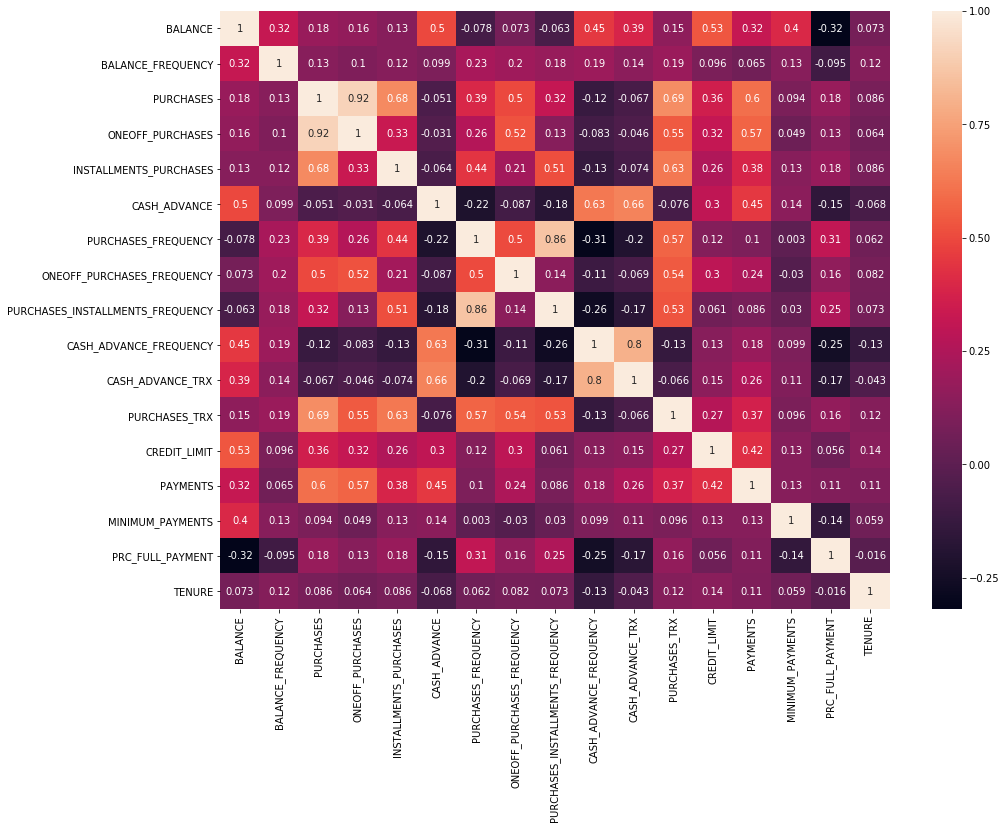

In [6]:
plt.figure(figsize=(15,11))
sns.heatmap(data.corr(),annot=True)

- Dropping the purchase & purchase_frequency

In [7]:
data.drop(columns=['PURCHASES','PURCHASES_FREQUENCY','CUST_ID'],inplace= True)

- Treating the missing values

In [8]:
data.loc[:,data.isnull().any()].isnull().sum()

CREDIT_LIMIT          1
MINIMUM_PAYMENTS    313
dtype: int64

### Fixing the min_payments 

- Looking how's it related to a few other variables

- Based on the analysis shown, we can consider a direct relation bw `min_payment` & `Balance` are somehow directly related(though the slope is varying)
- Based on the correlation matrix we can say that the `min_payment` & `Balance` are related

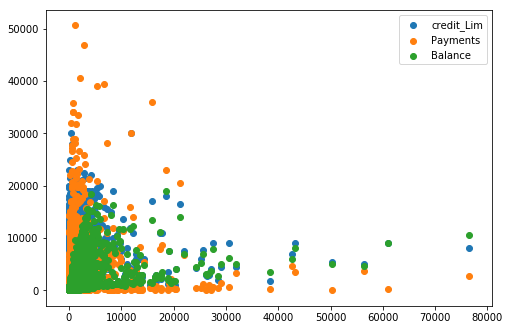

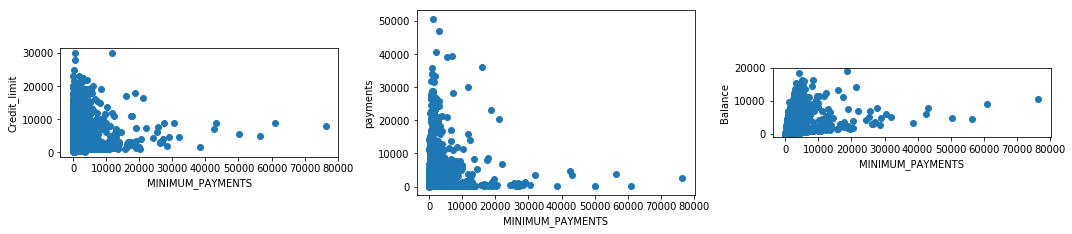

In [10]:
plt.figure(figsize=(8,8))


plt.scatter(x=data.MINIMUM_PAYMENTS,y=data.CREDIT_LIMIT,label='credit_Lim')

plt.scatter(x=data.MINIMUM_PAYMENTS,y=data.PAYMENTS,label='Payments')

plt.scatter(x=data.MINIMUM_PAYMENTS,y=data.BALANCE, label = 'Balance')

plt.axis('scaled')
plt.legend()


#---------------------------------------------------------------

plt.figure(figsize=(15,10))
plt.subplot(131)
plt.scatter(x=data.MINIMUM_PAYMENTS,y=data.CREDIT_LIMIT)
plt.xlabel('MINIMUM_PAYMENTS')
plt.ylabel('Credit_limit')
plt.axis('scaled')

plt.subplot(132)
plt.scatter(x=data.MINIMUM_PAYMENTS,y=data.PAYMENTS)
plt.xlabel('MINIMUM_PAYMENTS')
plt.ylabel('payments')
plt.axis('scaled')

plt.subplot(133)
plt.scatter(x=data.MINIMUM_PAYMENTS,y=data.BALANCE)
plt.xlabel('MINIMUM_PAYMENTS')
plt.ylabel('Balance')
plt.axis('scaled')
# MINIMUM_PAYMENTS

plt.tight_layout()

- Calculating the slopes categories

- we can see that the majority of slopes lie in 0.2 - 0.5 range

In [11]:
t = data.loc[data.MINIMUM_PAYMENTS.notnull(),'MINIMUM_PAYMENTS']/data.loc[data.BALANCE != 0,'BALANCE']
tf = pd.cut(t,[0,0.2,0.35,0.5,1,10,100],labels=[1,2,3,4,5,6])
tf.value_counts()
# labels=['H','M',"L",'VL']

2    3025
5    2271
4    1467
3    1407
6     305
1     144
dtype: int64

In [12]:
0.35*data.BALANCE.mean(),data.MINIMUM_PAYMENTS.mean()

(547.5661896873363, 864.2065423050814)

- **Missing value treatment**
- Out of both the above values we are taking the mean value 

In [13]:
data.MINIMUM_PAYMENTS.fillna(data.MINIMUM_PAYMENTS.mean(),inplace=True)


In [9]:
# dropping the row with missing Credit Limit
data.dropna(axis =0,inplace=True)

In [10]:
data.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [16]:
data.head(2)

,BALANCE,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,0.0,95.4,0.000000,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.0,0.0,6442.945483,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12


#### BoxPlot for outlier treatment

- As can be seen, a lot of outliers exist, Fixing them

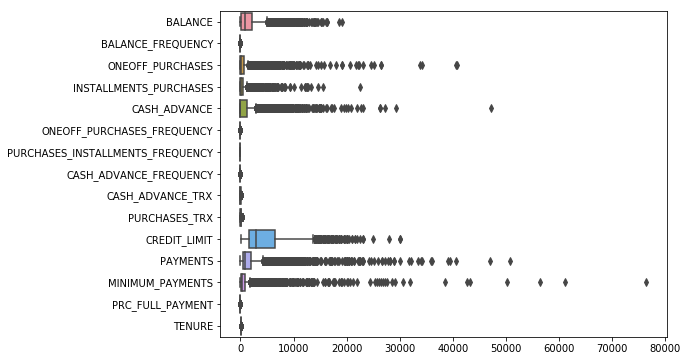

In [11]:
plt.figure(figsize=(8,6))
sns.boxplot(data=data,orient='h')

In [12]:
data.describe(percentiles=[.05,.25,.5,.75,.95]).T

,count,mean,std,min,5%,25%,50%,75%,95%,max
BALANCE,8636.0,1601.224893,2095.571300,0.000000,13.209472,148.095189,916.855459,2105.195853,5936.635587,19043.13856
BALANCE_FREQUENCY,8636.0,0.895035,0.207697,0.000000,0.363636,0.909091,1.000000,1.000000,1.000000,1.00000
ONEOFF_PURCHASES,8636.0,604.901438,1684.307803,0.000000,0.000000,0.000000,44.995000,599.100000,2728.372500,40761.25000
INSTALLMENTS_PURCHASES,8636.0,420.843533,917.245182,0.000000,0.000000,0.000000,94.785000,484.147500,1800.000000,22500.00000
CASH_ADVANCE,8636.0,994.175523,2121.458303,0.000000,0.000000,0.000000,0.000000,1132.385490,4721.415498,47137.21176
ONEOFF_PURCHASES_FREQUENCY,8636.0,0.205909,0.300054,0.000000,0.000000,0.000000,0.083333,0.333333,1.000000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8636.0,0.368820,0.398093,0.000000,0.000000,0.000000,0.166667,0.750000,1.000000,1.00000
CASH_ADVANCE_FREQUENCY,8636.0,0.137604,0.201791,0.000000,0.000000,0.000000,0.000000,0.250000,0.583333,1.50000
CASH_ADVANCE_TRX,8636.0,3.313918,6.912506,0.000000,0.000000,0.000000,0.000000,4.000000,15.000000,123.00000
PURCHASES_TRX,8636.0,15.033233,25.180468,0.000000,0.000000,1.000000,7.000000,18.000000,59.000000,358.00000


- Starting with **DBScan** without outlier treatment since it can treat outliers on its own

In [13]:
sc = StandardScaler()
data_sc = sc.fit_transform(data)

/home/rohan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/rohan/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


#### Loop for DBscan params

In [14]:
df = pd.DataFrame(index=np.arange(0,15))
for x in [.5,1,1.5,2,2.5]:
    for y in [6,8,10,12]:
        dbs = DBSCAN(eps = x,min_samples= y)
        dbs.fit(data_sc)
        label_count = pd.Series(dbs.labels_)
        vc = label_count.value_counts()
        #vc_cent = vc.apply(lambda x:round(x*100/vc.sum()))
        vc_cent = pd.DataFrame(vc,columns=['eps:{0}_minpoint:{1}'.format(x,y)])
        df = df.merge(vc_cent,how='outer',left_index=True,right_index=True)

In [21]:
df.T

,-1,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
eps:0.5_minpoint:6,6547.0,2075.0,8.0,6.0,14.0,21.0,14.0,10.0,9.0,39.0,...,5.0,9.0,5.0,6.0,23.0,6.0,6.0,10.0,6.0,3.0
eps:0.5_minpoint:8,6852.0,1638.0,235.0,16.0,13.0,8.0,23.0,13.0,10.0,8.0,...,8.0,10.0,8.0,3.0,6.0,NaN,NaN,NaN,NaN,NaN
eps:0.5_minpoint:10,7035.0,1581.0,220.0,22.0,26.0,20.0,25.0,10.0,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eps:0.5_minpoint:12,7139.0,1529.0,207.0,22.0,26.0,13.0,13.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eps:1_minpoint:6,2959.0,5913.0,31.0,8.0,6.0,13.0,6.0,6.0,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eps:1_minpoint:8,3171.0,5701.0,14.0,11.0,24.0,6.0,13.0,9.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eps:1_minpoint:10,3382.0,5539.0,14.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eps:1_minpoint:12,3528.0,5385.0,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eps:1.5_minpoint:6,1208.0,7725.0,10.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eps:1.5_minpoint:8,1297.0,7644.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- From here we can do 2 things,


1. outlier_treatment & then try `kmeans` & see if we should go with 2 or 3 clusters
2. build the model using DBscan 2 combinations ( 1 with 2 features & other with 3 features) & compare the means

In [17]:
# 3 cluster combination
DBS_2 = DBSCAN(eps=1,min_samples=12).fit(data_sc)

# 2 cluster combination
DBS_3 =DBSCAN(eps=0.5,min_samples=12).fit(data_sc)

In [18]:
# Conactenating labels found through DBScan with data 

# save the cluster labels and sort by cluster
data['cluster_2'] = DBS_2.labels_
data['cluster_3'] = DBS_3.labels_
# telco_num['cluster_5'] = km_5.labels_
# telco_num['cluster_6'] = km_6.labels_
# telco_num['cluster_7'] = km_7.labels_
# telco_num['cluster_8'] = km_8.labels_

In [25]:
data.cluster_2.value_counts()

 0    5385
-1    3528
 1      36
Name: cluster_2, dtype: int64

In [26]:
size=pd.concat([pd.Series(data.cluster_2.size),pd.Series.sort_index(data.cluster_2.value_counts()),
                pd.Series.sort_index(data.cluster_3.value_counts())])
size

 0    8949
-1    3528
 0    5385
 1      36
-1    7139
 0    1529
 1     207
 2      22
 3      26
 4      13
 5      13
dtype: int64

- `Seg_size` captures the number of variables in each clusters
- `Seg_Pct` captures the % repr of obs in each cluster

In [27]:
Seg_size=pd.DataFrame(size, columns=['Seg_size'])
Seg_Pct = pd.DataFrame(size/data.cluster_3.size, columns=['Seg_Pct'])
Seg_size.T

,0,-1,0,1,-1,0,1,2,3,4,5
Seg_size,8949,3528,5385,36,7139,1529,207,22,26,13,13


In [28]:
Seg_Pct.T

,0,-1,0,1,-1,0,1,2,3,4,5
Seg_Pct,1.0,0.394234,0.601743,0.004023,0.797743,0.170857,0.023131,0.002458,0.002905,0.001453,0.001453


In [29]:
data.head(2)

,BALANCE,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_2,cluster_3
0,40.900749,0.818182,0.0,95.4,0.000000,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,0,-1
1,3202.467416,0.909091,0.0,0.0,6442.945483,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,-1,-1


In [30]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
Profling_output = pd.concat([data.apply(lambda x: x.mean()).T,
                             data.groupby('cluster_2').apply(lambda x: x.mean()).T, 
                             data.groupby('cluster_3').apply(lambda x: x.mean()).T], axis=1)

Profling_output_final=pd.concat([Seg_size.T, Seg_Pct.T, Profling_output], axis=0)
#Profling_output_final.columns = ['Seg_' + str(i) for i in Profling_output_final.columns]
Profling_output_final.columns = ['Overall', 'DBS2_1', 'DBS2_2','DBS2_3', 'DBS3_1',
                                 'DBS3_2', 'DBS3_3','DBS3_4','DBS3_5','DBS3_6','DBS3_7']

In [31]:
Profling_output_final

,Overall,DBS2_1,DBS2_2,DBS2_3,DBS3_1,DBS3_2,DBS3_3,DBS3_4,DBS3_5,DBS3_6,DBS3_7
Seg_size,8949.000000,3528.000000,5385.000000,36.000000,7139.000000,1529.000000,207.000000,22.000000,26.000000,13.000000,13.000000
Seg_Pct,1.000000,0.394234,0.601743,0.004023,0.797743,0.170857,0.023131,0.002458,0.002905,0.001453,0.001453
BALANCE,1564.647593,2472.324984,979.853508,87.711832,1760.777847,930.622289,25.630971,0.034974,16.133056,226.344461,19.112389
BALANCE_FREQUENCY,0.877350,0.894740,0.865272,0.979798,0.875886,0.996849,0.257795,0.008264,0.297202,0.440559,0.559441
ONEOFF_PURCHASES,592.503572,1207.045119,187.736117,913.897222,725.373324,64.647443,116.962899,2.075000,28.707692,0.000000,1.923077
INSTALLMENTS_PURCHASES,411.113579,715.305031,214.464299,15.806111,484.361755,131.691138,34.025169,267.800000,168.230385,0.000000,194.792308
CASH_ADVANCE,978.959616,1847.481072,416.480688,1.329877,1175.683261,233.410357,0.908233,0.000000,0.000000,802.643368,0.000000
ONEOFF_PURCHASES_FREQUENCY,0.202480,0.343806,0.104884,0.951389,0.243311,0.040495,0.059984,0.003788,0.019231,0.000000,0.006410
PURCHASES_INSTALLMENTS_FREQUENCY,0.364478,0.435372,0.320345,0.018519,0.387257,0.295782,0.060789,0.988636,0.195513,0.000000,0.416667
CASH_ADVANCE_FREQUENCY,0.135141,0.210293,0.086792,0.002315,0.152034,0.080227,0.000805,0.000000,0.000000,0.089743,0.000000


In [129]:
#Profling_output_final.to_csv('/home/rohan/Desktop/Profling_output_final')

In [1]:
from IPython.display import Image
Image("/home/rohan/Desktop/jupyter/ROHAN_ALL/SM_&_ML/Case_study/Credit card segmentation/Screenshot from 2019-03-05 00-58-23.png")

TypeError: a bytes-like object is required, not 'str'

TypeError: a bytes-like object is required, not 'str'

<IPython.core.display.Image object>

- **Conclusion**

- DBS2 serves well in making judgement

- DBS2_1 - higher credit limit + risky customers + Moneymaking customers + 3.5k customers
- DBS2_2 - lower crefit limit + safe players + low spenders 


#### Verdict
- Based on the above analysis DBS_1 customers can be targeted with cross sell & other related product offerings while we can pause the extra cutomers benfits to DBS2_2 customers as these are anyway not spending much & are also not defaulting on anything 

### Clustering Using `KMeans`

Since KMeans is a technique that gets affected by outliers present, thats why we are clipping the outliers values first before building the model

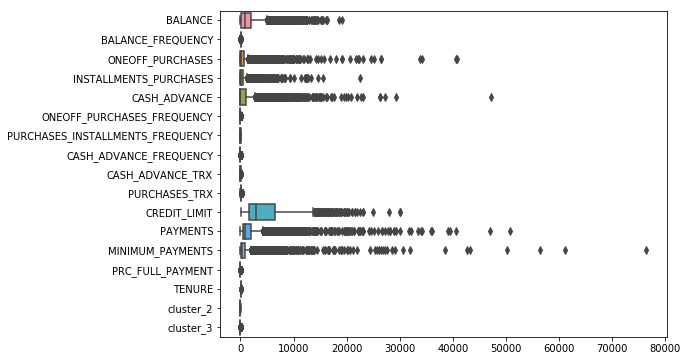

In [32]:
plt.figure(figsize=(8,6))
sns.boxplot(data=data,orient='h')

In [33]:
data.describe(percentiles=[.03,.05,.25,.5,.75,.95,.97]).T

,count,mean,std,min,3%,5%,25%,50%,75%,95%,97%,max
BALANCE,8949.0,1564.647593,2081.584016,0.000000,4.387025,8.813965,128.365782,873.680279,2054.372848,5909.377888,7085.196339,19043.13856
BALANCE_FREQUENCY,8949.0,0.877350,0.236798,0.000000,0.181818,0.272727,0.888889,1.000000,1.000000,1.000000,1.000000,1.00000
ONEOFF_PURCHASES,8949.0,592.503572,1659.968851,0.000000,0.000000,0.000000,0.000000,38.000000,577.830000,2671.528000,3610.001600,40761.25000
INSTALLMENTS_PURCHASES,8949.0,411.113579,904.378205,0.000000,0.000000,0.000000,0.000000,89.000000,468.650000,1750.420000,2273.284000,22500.00000
CASH_ADVANCE,8949.0,978.959616,2097.264344,0.000000,0.000000,0.000000,0.000000,0.000000,1113.868654,4647.894019,6011.667259,47137.21176
ONEOFF_PURCHASES_FREQUENCY,8949.0,0.202480,0.298345,0.000000,0.000000,0.000000,0.000000,0.083333,0.300000,1.000000,1.000000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8949.0,0.364478,0.397451,0.000000,0.000000,0.000000,0.000000,0.166667,0.750000,1.000000,1.000000,1.00000
CASH_ADVANCE_FREQUENCY,8949.0,0.135141,0.200132,0.000000,0.000000,0.000000,0.000000,0.000000,0.222222,0.583333,0.666667,1.50000
CASH_ADVANCE_TRX,8949.0,3.249078,6.824987,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,15.000000,19.000000,123.00000
PURCHASES_TRX,8949.0,14.711476,24.858552,0.000000,0.000000,0.000000,1.000000,7.000000,17.000000,57.000000,75.000000,358.00000


In [34]:
data = data.apply(lambda x:x.clip_lower(x.quantile(0.03)))
data = data.apply(lambda x:x.clip_upper(x.quantile(0.97)))

#### Analysing the SC value & Elbow curve

In [35]:
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters)
    clusters.fit( data_sc )
    cluster_errors.append( clusters.inertia_ )

In [36]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:10]

,num_clusters,cluster_errors
0,1,134235.000000
1,2,114795.487986
2,3,99526.757518
3,4,91862.333738
4,5,84747.950789
5,6,78663.092693
6,7,73986.399102
7,8,68248.215489
8,9,65781.082157
9,10,61149.272327


Text(0,0.5,'inertia:Error')

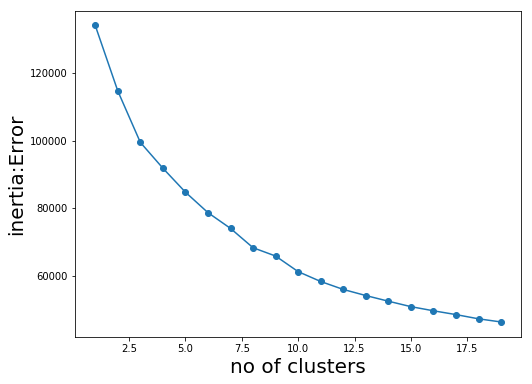

In [37]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.xlabel('no of clusters',fontsize = 20)
plt.ylabel('inertia:Error',fontsize = 20)


### Silhouette Coefficient

In [38]:
# calculate SC for K=2 through K=12
k_range = range(2, 12)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(data_sc)
    scores.append(metrics.silhouette_score(data_sc, km.labels_))

In [39]:
scores

[0.32932885839313825,
 0.27433275478666236,
 0.15748185251840616,
 0.17688694126236387,
 0.18661147730646227,
 0.20377507589614516,
 0.20711884495738012,
 0.2056997757145927,
 0.20998076281920222,
 0.20651177795606676]

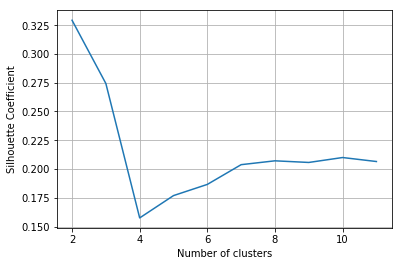

In [40]:
# plot the results
plt.figure(figsize=(6,4))
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

#### Conclusion

- Based on the above curves we can conclude that the best params for clustering could be
- n = 2 or maybe 3 , Most prob 2!

In [41]:
km_2 =  KMeans(n_clusters=2)
km_2.fit(data_sc)

pd.Series(km_2.labels_).value_counts()

0    7270
1    1679
dtype: int64

In [42]:
km_3 =  KMeans(n_clusters=3)
km_3.fit(data_sc)

pd.Series(km_3.labels_).value_counts()

0    6259
1    1528
2    1162
dtype: int64

In [43]:
data['cluster_2'] = km_2.labels_
data['cluster_3'] = km_3.labels_

In [44]:
size=pd.concat([pd.Series(data.cluster_3.size),
                pd.Series.sort_index(data.cluster_2.value_counts()), 
                pd.Series.sort_index(data.cluster_3.value_counts())])
            

In [45]:
Seg_size=pd.DataFrame(size, columns=['Seg_size'])
Seg_Pct = pd.DataFrame(size/data.cluster_3.size, columns=['Seg_Pct'])
Seg_size.T

,0,0,1,0,1,2
Seg_size,8949,7270,1679,6259,1528,1162


In [46]:
Seg_Pct.T

,0,0,1,0,1,2
Seg_Pct,1.0,0.812381,0.187619,0.699408,0.170745,0.129847


In [47]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
Profling_output = pd.concat([data.apply(lambda x: x.mean()).T, data.groupby('cluster_2').apply(lambda x: x.mean()).T, 
                             data.groupby('cluster_3').apply(lambda x: x.mean()).T], axis=1)

Profling_output_final=pd.concat([Seg_size.T, Seg_Pct.T, Profling_output], axis=0)
Profling_output_final

,0,0,1,0,1,2
Seg_size,8949.000000,7270.000000,1679.000000,6259.000000,1528.000000,1162.000000
Seg_Pct,1.000000,0.812381,0.187619,0.699408,0.170745,0.129847
BALANCE,1498.881103,877.298807,4190.306529,821.284766,3849.412765,2057.799428
BALANCE_FREQUENCY,0.879867,0.859222,0.969258,0.840717,0.963048,0.981360
ONEOFF_PURCHASES,484.830997,431.163387,717.209508,259.801287,284.760213,1960.019563
INSTALLMENTS_PURCHASES,356.610350,337.358258,439.971109,253.173311,165.951060,1164.475950
CASH_ADVANCE,870.782275,361.694550,3075.110897,351.365266,3388.817027,357.420790
ONEOFF_PURCHASES_FREQUENCY,0.202480,0.195000,0.234870,0.132016,0.125752,0.682926
PURCHASES_INSTALLMENTS_FREQUENCY,0.364478,0.376575,0.312098,0.339435,0.176165,0.746995
CASH_ADVANCE_FREQUENCY,0.130859,0.074559,0.374633,0.071528,0.432781,0.053418


- As can be seen only 2 clusters are relevant where each cluster represent the following:
        - cluster_1 : High spenders + high Credit limit + revenue generating + risky        
        - cluster_2 : Low spenders + medium/low credit limit + safe players + less risky 